In [1]:
!pip install roboticstoolbox-python>=1.0.2
%matplotlib notebook

In [2]:
import roboticstoolbox as rtb
from roboticstoolbox import DHRobot, RevoluteDH, PrismaticDH, PrismaticMDH
from math import pi
from spatialmath import SE3
import matplotlib.pyplot as plt

# Link 1
m1 = 1
d1 = 0
a1 = 0.290

# Link 2
m2 = 1
d2 = 1.2
a2 = 0

#Link 3
m3 = 1
d3 = 2.4
a3 = 0

#Link 4
m4 = 1
d4 = 0.36
a4 = 0

#Link 5
m5 = 1
d5 = 0
a5 = 0

#Link 6
m6 = 1
d6 = 0.169
a6 = 0.16

g = 9.8 # gravity


L1 = RevoluteDH(a=a1,d=d1,alpha= 0   , m=m1, qlim=[-185*pi/180, 185*pi/180])
L2 = RevoluteDH(a=a2,d=d2,alpha= pi/2, m=m2, qlim=[-146*pi/180, 0])
L3 = RevoluteDH(a=a3,d=d3,alpha= 0   , m=m3, qlim=[-119*pi/180, 155*pi/180])
L4 = RevoluteDH(a=a4,d=d4,alpha= pi/2, m=m4, qlim=[-350*pi/180, 350*pi/180])
L5 = RevoluteDH(a=a5,d=d5,alpha= pi/2, m=m5, qlim=[-125*pi/180, 125*pi/180])
L6 = RevoluteDH(a=a6,d=d6,alpha= 0   , m=m6, qlim=[-350*pi/180, 350*pi/180])

robot = DHRobot([L1,L2,L3,L4,L5,L6], gravity=[0, 0, g], name="KUKA150 - 2") # gravity acts in (x,y,z), name is optional
# we set +g because accelerating upwards provides the earth gravity
print(robot) # shows dh table

DHRobot: KUKA150 - 2, 6 joints (RRRRRR), dynamics, standard DH parameters
┌────┬───────┬──────┬───────┬─────────┬────────┐
│θⱼ  │  dⱼ   │  aⱼ  │  ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼───────┼──────┼───────┼─────────┼────────┤
│ q1 │     0 │ 0.29 │  0.0° │ -185.0° │ 185.0° │
│ q2 │   1.2 │    0 │ 90.0° │ -146.0° │   0.0° │
│ q3 │   2.4 │    0 │  0.0° │ -119.0° │ 155.0° │
│ q4 │  0.36 │    0 │ 90.0° │ -350.0° │ 350.0° │
│ q5 │     0 │    0 │ 90.0° │ -125.0° │ 125.0° │
│ q6 │ 0.169 │ 0.16 │  0.0° │ -350.0° │ 350.0° │
└────┴───────┴──────┴───────┴─────────┴────────┘

┌─┬──┐
└─┴──┘



In [3]:
robot.addconfiguration('q_init', [0.1,0.1,0.1,0.1,0,pi/6])

robot.addconfiguration('q_lift_home', [0,-1.1500,1.3,0,1.1,0])

robot.addconfiguration('q_lift_conveyor', [1.57,-1.117,1.1519,0,1.5358,0])

robot.addconfiguration('q_pick_conveyor', [1.57,-1.047,1.3788,0,1.2391,0])

robot.addconfiguration('q_lift_blue', [-2.4260,-0.8203,0.6632,0,1.7301,2.3736])

robot.addconfiguration('q_place_blue', [-2.4260,-0.8028,0.9250,0,1.4311,2.3736])

robot.addconfiguration('q_end', [0.2,0.2,0.2,0.2,0,2*pi/3])

limits_plot=[-1,1,-1,1,-1,1]

<IPython.core.display.Javascript object>


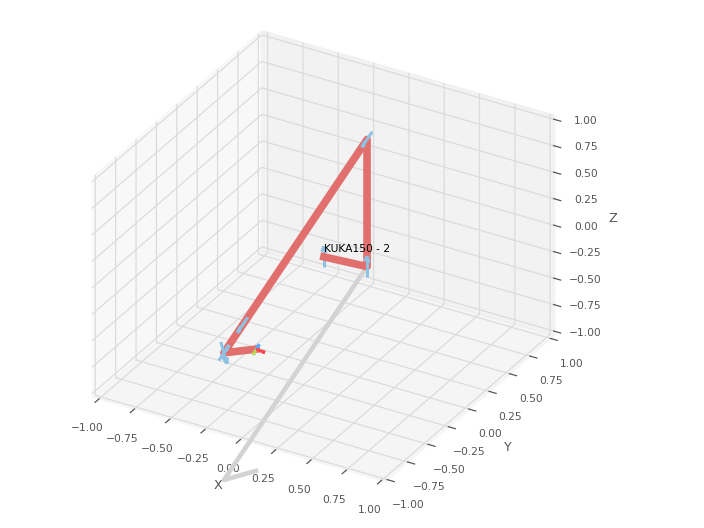

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'KUKA150 - 2')

In [23]:
robot.plot(robot.configs['q_init'],limits=limits_plot)


<IPython.core.display.Javascript object>


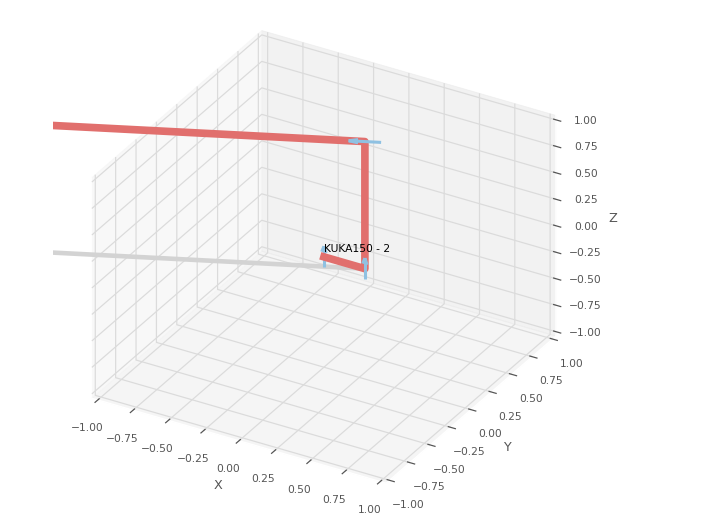

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'KUKA150 - 2')

In [24]:
robot.plot(robot.configs['q_lift_home'],limits=limits_plot)

<IPython.core.display.Javascript object>


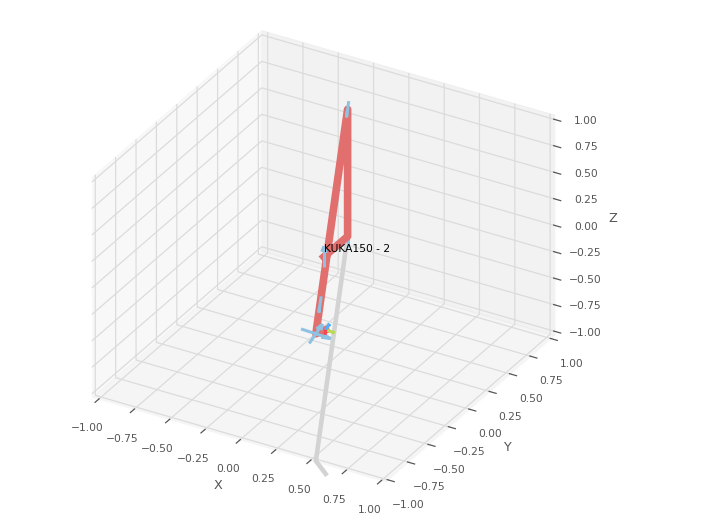

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'KUKA150 - 2')

In [25]:
robot.plot(robot.configs['q_lift_conveyor'],limits=limits_plot)

<IPython.core.display.Javascript object>


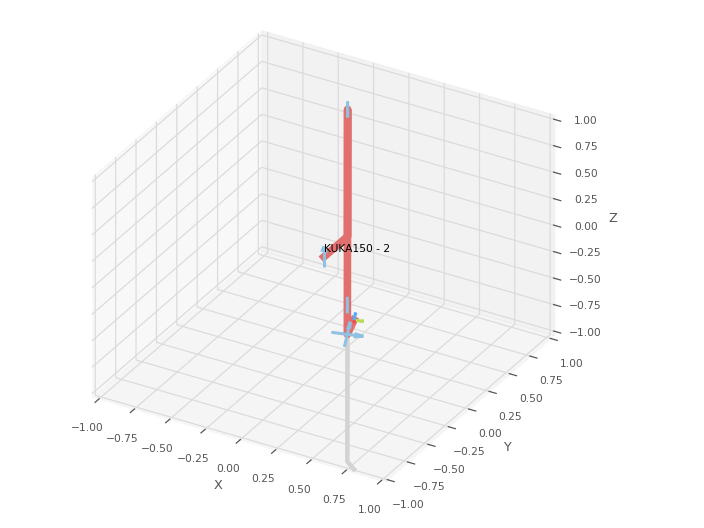

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'KUKA150 - 2')

In [26]:
robot.plot(robot.configs['q_pick_conveyor'],limits=limits_plot)

<IPython.core.display.Javascript object>


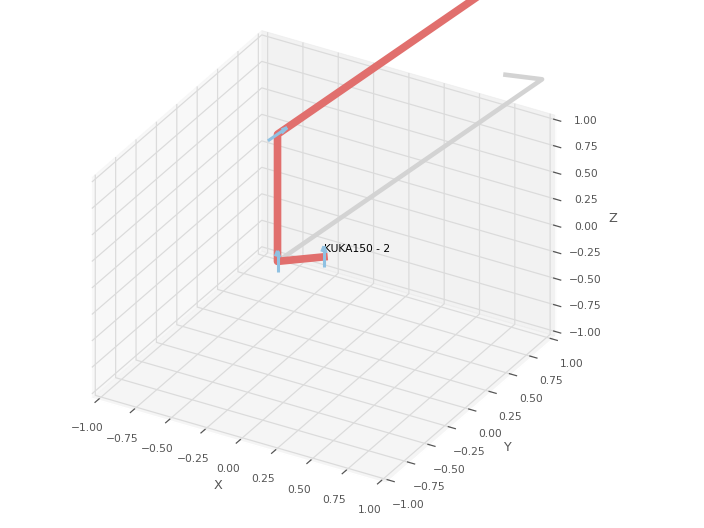

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'KUKA150 - 2')

In [27]:
robot.plot(robot.configs['q_lift_blue'],limits=limits_plot)

<IPython.core.display.Javascript object>


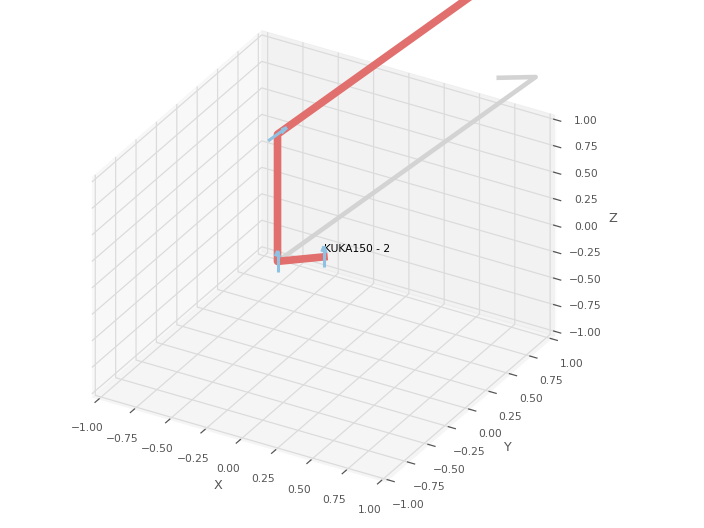

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'KUKA150 - 2')

In [28]:
robot.plot(robot.configs['q_place_blue'],limits=limits_plot)

In [10]:
robot.plot(robot.configs['q_end'],limits=limits_plot)

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'KUKA150 - 2')

<IPython.core.display.Javascript object>


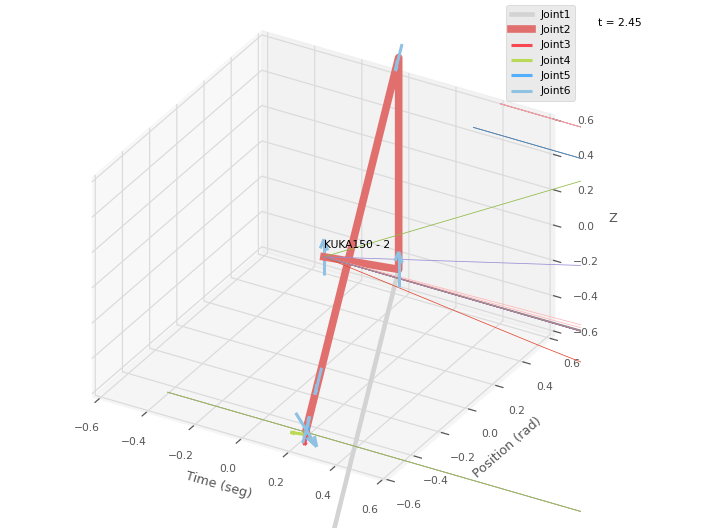

PyPlot3D backend, t = 2.499999999999999, scene:
  robot: Text(0.0, 0.0, 'KUKA150 - 2')

In [11]:
qt = rtb.jtraj(robot.configs['q_init'], robot.configs['q_end'], 50)
robot.plot(qt.q,limits=[-0.6, 0.6, -0.6, 0.6,-0.6, 0.6])

In [12]:
robot.configs

{'q_init': [0.1, 0.1, 0.1, 0.1, 0, 0.5235987755982988],
 'q_lift_home': [0, -1.15, 1.3, 0, 1.1, 0],
 'q_lift_conveyor': [1.57, -1.117, 1.1519, 0, 1.5358, 0],
 'q_pick_conveyor': [1.57, -1.047, 1.3788, 0, 1.2391, 0],
 'q_lift_blue': [-2.426, -0.8203, 0.6632, 0, 1.7301, 2.3736],
 'q_place_blue': [-2.426, -0.8028, 0.925, 0, 1.4311, 2.3736],
 'q_end': [0.2, 0.2, 0.2, 0.2, 0, 2.0943951023931953]}

In [35]:
import matplotlib.pyplot as plt
import roboticstoolbox as rtb
import numpy as np
qt = rtb.jtraj(robot.configs['q_init'], robot.configs['q_end'], 50)
qt1 = rtb.jtraj(robot.configs['q_lift_home'], robot.configs['q_lift_conveyor'], 50)
qt2 = rtb.jtraj(robot.configs['q_lift_conveyor'], robot.configs['q_pick_conveyor'], 50)
qt3 = rtb.jtraj(robot.configs['q_pick_conveyor'], robot.configs['q_lift_blue'], 50)
qt4 = rtb.jtraj(robot.configs['q_lift_blue'], robot.configs['q_place_blue'], 50)
pos = np.append(np.append(np.append(qt1.q,qt2.q,axis=0),qt3.q,axis=0),qt4.q,axis=0)  #qt.q
vel = np.append(np.append(np.append(qt1.qd,qt2.qd,axis=0),qt3.qd,axis=0),qt4.qd,axis=0) #qt.qd
acc = np.append(np.append(np.append(qt1.qdd,qt2.qdd,axis=0),qt3.qdd,axis=0),qt4.qdd,axis=0) #qt.qdd
time =np.append(np.append(np.append(qt1.t,qt2.t+50,axis=0),qt3.t+100,axis=0),qt4.t+150,axis=0)  #qt.t*5/100
#print(np.append(qt.q,qt2.q,axis=0))


<IPython.core.display.Javascript object>


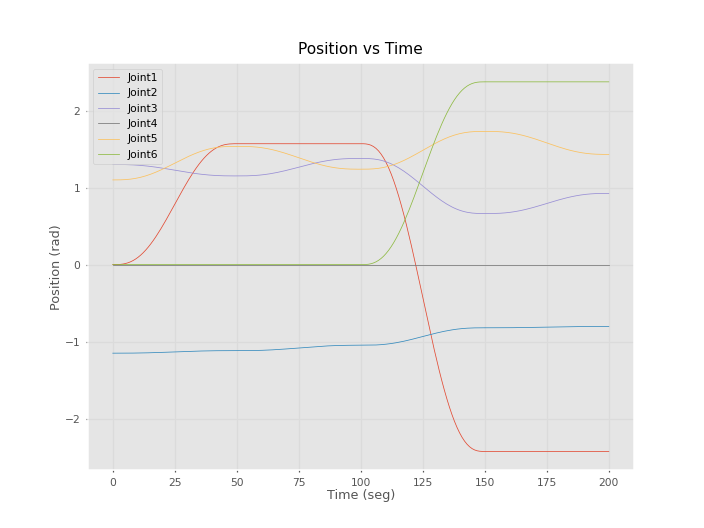

In [36]:
plt.plot(time,pos)
plt.title("Position vs Time")
plt.xlabel("Time (seg)")
plt.ylabel("Position (rad)")
plt.legend(["Joint1","Joint2","Joint3","Joint4","Joint5","Joint6"])
plt.show()

<IPython.core.display.Javascript object>


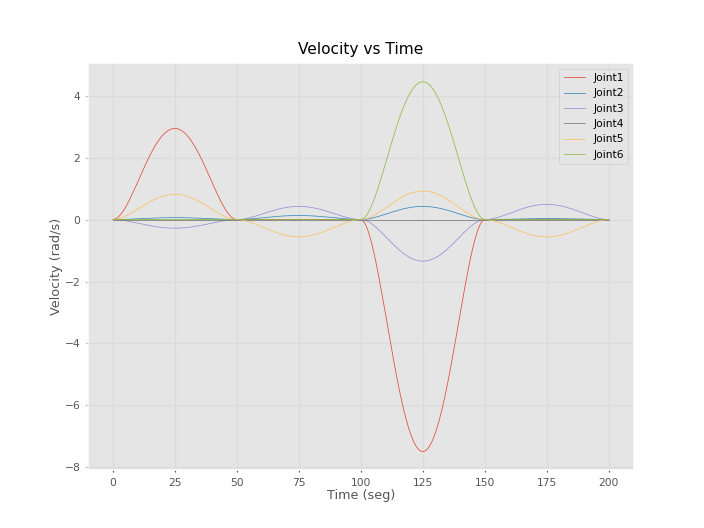

In [37]:
plt.plot(time,vel)
plt.title("Velocity vs Time")
plt.xlabel("Time (seg)")
plt.ylabel("Velocity (rad/s)")
plt.legend(["Joint1","Joint2","Joint3","Joint4","Joint5","Joint6"])
plt.show()

<IPython.core.display.Javascript object>


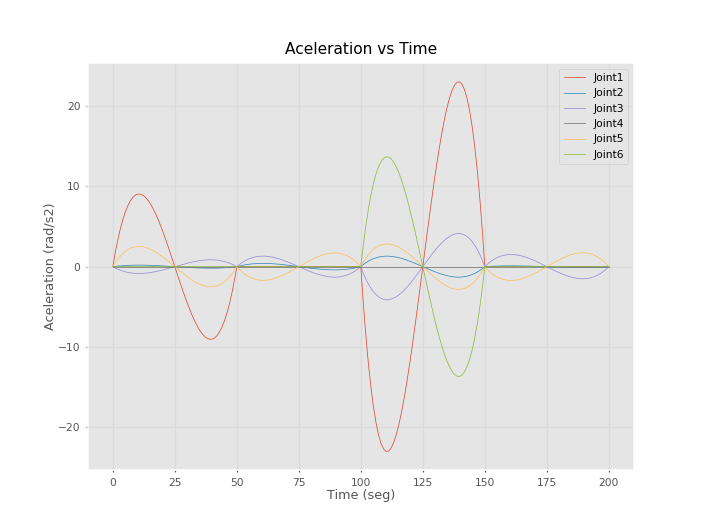

In [38]:
plt.plot(time,acc)
plt.title("Aceleration vs Time")
plt.xlabel("Time (seg)")
plt.ylabel("Aceleration (rad/s2)")
plt.legend(["Joint1","Joint2","Joint3","Joint4","Joint5","Joint6"])
plt.show()

# Compute the forward kinematics and Jacobian for any instant

In [17]:
configurations = [
                  [0.1,0.1,0.1,0.1,0,pi/6], #q_init
                  [0,-1.1500,1.3,0,1.1,0],  #q_lift_home
                  [1.57,-1.117,1.1519,0,1.5358,0],  #q_lift_conveyor
                  [1.57,-1.047,1.3788,0,1.2391,0],  #q_pick_conveyor
                  [-2.4260,-0.8203,0.6632,0,1.7301,2.3736], #q_lift_blue
                  [-2.4260,-0.8028,0.9250,0,1.4311,2.3736], #q_place_blue
                  [0.2,0.2,0.2,0.2,0,2*pi/3]  #q_end
                  ]

In [18]:
#Select a configuration of any of the instants between a 50 range
#Fordward Kinematics
import numpy as np
quaternions=[]
for i in range(len(configurations)):
    print("Instant: ", i)
    qs = qt.q[i]
    #print(qt.q)
    T=robot.fkine(qs)
    R=np.array(T)[:3,:3]
    theta = np.arccos((np.trace(R)-1)/2)
    omega = np.array([ R[2,1]-R[1,2], R[0,2]-R[2,0] , R[1,0]-R[0,1]  ]) * 1/ (2 *np.sin(theta))
    quaternion = np.append(np.cos(theta/2),omega)
    print(R)
    print(np.trace(R))
    #print(quaternion)
    quaternions.append(quaternion)

np.array(quaternions)


Instant:  0
[[ 9.29198397e-01 -3.11642160e-01 -1.98669331e-01]
 [ 1.88357840e-01 -6.31729933e-02  9.80066578e-01]
 [-3.17980601e-01 -9.48097219e-01 -1.81255880e-16]]
0.8660254037844385
Instant:  1
[[ 9.29160078e-01 -3.11746095e-01 -1.98685486e-01]
 [ 1.88366018e-01 -6.31994119e-02  9.80063303e-01]
 [-3.18087714e-01 -9.48061288e-01 -1.81255479e-16]]
0.8659606657066773
Instant:  2
[[ 9.28900972e-01 -3.12447910e-01 -1.98794589e-01]
 [ 1.88421151e-01 -6.33779021e-02  9.80041178e-01]
 [-3.18811002e-01 -9.47818308e-01 -1.81252769e-16]]
0.8655230694533435
Instant:  3
[[ 9.28223302e-01 -3.14275534e-01 -1.99078856e-01]
 [ 1.88564030e-01 -6.38435398e-02  9.79983474e-01]
 [-3.20694729e-01 -9.47182607e-01 -1.81245702e-16]]
0.864379761701085
Instant:  4
[[ 9.26949006e-01 -3.17681752e-01 -1.99609231e-01]
 [ 1.88827624e-01 -6.47145528e-02  9.79875581e-01]
 [-3.24206213e-01 -9.45986433e-01 -1.81232489e-16]]
0.8622344531825155
Instant:  5
[[ 9.24912667e-01 -3.23044915e-01 -2.00445855e-01]
 [ 1.89235486

array([[ 0.6830127 , -0.96625227,  0.05978993,  0.25056281],
       [ 0.68300085, -0.96623473,  0.05983565,  0.25061954],
       [ 0.68292076, -0.96611613,  0.06014432,  0.25100257],
       [ 0.68271146, -0.96580609,  0.06094822,  0.25199982],
       [ 0.68231856, -0.96522364,  0.06244682,  0.25385766],
       [ 0.68169243, -0.96429438,  0.06480724,  0.25678078],
       [ 0.68078637, -0.96294759,  0.06816477,  0.26093201]])

In [19]:
import numpy as np
def conjQ(Q1):
    Q_star = np.append(Q1[0], -1*np.array(Q1[1:4]))
    return Q_star

def pow(tau,q1): #q1 = [ 7 , 5 , 5 , 7]
    a0=2*np.arccos(q1[0]) #q1(1)=cos(a0/2)
    u=np.array(q1[1:4])/(np.sin(a0/2)) #q1(2:4)=u*sin(a0/2)   u = [8,8,6]
    Q_maria=np.append(np.cos(tau*a0/2),u*(np.sin(tau*a0/2)))
    return Q_maria

def product(q1,q2):
      escalar = q1[0]*q2[0]-np.dot(q1[1:4],q2[1:4])
      vector =  q1[0]*q2[1:4]+q2[0]*q1[1:4]+np.cross(q1[1:4],q2[1:4])
      Q_juanito=np.append(escalar,vector)
      return Q_juanito


In [20]:
q0 = quaternions[1]
qf = quaternions[2]

x_tao= np.arange(0,1,1/500)
y_theta=np.zeros(len(x_tao))

for i in range(len(x_tao)):
    q_powp0pf_x=pow(x_tao[i],product(conjQ(q0),qf))
    q_dtao_x= product(q0,q_powp0pf_x)
    print(q_dtao_x)
    y_theta[i]=2*np.arccos(np.dot(q_dtao_x,q0))
    print(2*np.arccos(np.dot(q_dtao_x,q0)))

#print(x_tao)
#print(y_theta)
plt.plot(x_tao,y_theta)
plt.show()

[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan n

C:\Users\camil\AppData\Local\Temp\ipykernel_16872\3025779388.py:7: RuntimeWarning: invalid value encountered in arccos
  a0=2*np.arccos(q1[0]) #q1(1)=cos(a0/2)


[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan nan nan]
nan
[nan nan n

In [21]:
#Select a configuration of any of the instants between a 50 range
#Jacobian
for i in range(len(configurations)):
    print("Instant: ", i)
    qs = qt.q[i]
    print(robot.jacob0(qs))

Instant:  0
[[ 2.48026356e+00  2.50921525e+00  4.98627456e-02  4.98627456e-02
   1.89858084e-01 -4.98627456e-02]
 [ 9.51975188e-01  6.63423980e-01  1.01076789e-02  1.01076789e-02
  -1.02896159e-01 -1.01076789e-02]
 [ 7.64155081e-17  2.34965367e-17  1.51695555e-01  1.51695555e-01
   3.35751169e-02 -1.51695555e-01]
 [ 8.95873295e-17  8.95873295e-17  1.98669331e-01  1.98669331e-01
   1.94709171e-01 -1.98669331e-01]
 [-1.35976222e-17 -1.35976222e-17 -9.80066578e-01 -9.80066578e-01
   3.94695030e-02  9.80066578e-01]
 [ 1.00000000e+00  1.00000000e+00  6.12323400e-17  6.12323400e-17
  -9.80066578e-01 -1.81255880e-16]]
Instant:  1
[[ 2.48025139e+00  2.50920546e+00  4.98793752e-02  4.98793752e-02
   1.89857180e-01 -4.98793752e-02]
 [ 9.52010675e-01  6.63459706e-01  1.01119059e-02  1.01119059e-02
  -1.02882988e-01 -1.01119059e-02]
 [-8.46557073e-17 -1.11044080e-16  1.51689806e-01  1.51689806e-01
   3.35778471e-02 -1.51689806e-01]
 [-1.47678852e-17 -1.47678852e-17  1.98685486e-01  1.98685486e-01


# Dinamics

In [22]:
import matplotlib.pyplot as plt
import numpy as np
#Obtation of the dynamics equation for 10 instant of time
for i in range(len(configurations)):
    print("Instant " , i ,": ")
    #Obtation of the dynamics equation
    pos = qt.q[i]
    vel = qt.qd[i]
    acc = qt.qdd[i]

    # M is the manipulator inertia
    M= robot.inertia(configurations[i])

    #  C is the matrix containing the Coriolis and centrifugal terms
    C= robot.coriolis(configurations[i],configurations[i])

    # u the gravity vector
    u=[0, 0, 9.81]

    # Dynamic equation of motion of a manipulator:
    tao= (M*acc)+(C*acc)+(u[1]*pos)

    print(tao)

    # So consider ther Structural Properties of Robot EoM
    # 1) Positive definite, invertible mass matrix M(q)
    # 2) Skew symmetric matrix

Instant  0 : 
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Instant  1 : 
[[ 2.63565109e+00  2.90404852e+00 -6.05804783e-02 -6.05804783e-02
   0.00000000e+00  9.14083331e-01]
 [ 3.08612188e+00  3.41257560e+00 -7.07361242e-02 -7.07361242e-02
   0.00000000e+00  1.05241027e+00]
 [-7.11462510e-02 -7.76957809e-02  3.86878831e-03  3.86878831e-03
   0.00000000e+00 -6.45380108e-02]
 [-7.11462510e-02 -7.76957809e-02  3.86878831e-03  3.86878831e-03
   0.00000000e+00 -6.45380108e-02]
 [ 8.07190725e-02  8.32238704e-02 -4.14966072e-03 -4.14966072e-03
   0.00000000e+00  4.67281771e-02]
 [ 5.10033136e-02  5.56985397e-02 -2.77345638e-03 -2.77345638e-03
   0.00000000e+00  4.62659994e-02]]
Instant  2 : 
[[ 5.06158330e+00  6.03271826e+00 -1.74628994e-02 -1.74628994e-02
   0.00000000e+00  2.03268693e+00]
 [ 5.44630072e+00  6.52629123e+00 -1.68947600e-02 -1.68947600e-02
   0.00000000e+00  2.19947549e+00]
 [-9.24905700e-02 -1.0